# Clustering

See our notes on [unsupervised learning](https://jennselby.github.io/MachineLearningCourseNotes/#unsupervised-learning), [K-means](https://jennselby.github.io/MachineLearningCourseNotes/#k-means-clustering), [DBSCAN](https://jennselby.github.io/MachineLearningCourseNotes/#dbscan-clustering), and [clustering validation](https://jennselby.github.io/MachineLearningCourseNotes/#clustering-validation).

For documentation of various clustering methods in scikit-learn, see http://scikit-learn.org/stable/modules/clustering.html

The code was based on the example at http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
which has the following comments:

Code source: Gaël Varoquaux<br/>
Modified for documentation by Jaques Grobler<br/>
License: BSD 3 clause

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

import pandas

## Iris Dataset

Before you go on, if you haven't used the iris dataset in a previous assignment, make sure you understand it. Modify the cell below to examine different parts of the dataset that are contained in the iris dictionary object.

What are the features? What are we trying to classify?

In [2]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris_df = pandas.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Visualization Setup

In [12]:
# We can only plot 3 of the 4 iris features, since we only see in 3D.
# These are the ones the example code picked
X_FEATURE = 'petal width (cm)' 
Y_FEATURE = 'sepal length (cm)' 
Z_FEATURE = 'petal length (cm)'

# set some bounds for the figures that will display the plots of clusterings with various
# hyperparameter settings
# this allows for NUM_COLS * NUM_ROWS plots in the figure
NUM_COLS = 4
NUM_ROWS = 6
FIG_WIDTH = 4 * NUM_COLS
FIG_HEIGHT = 3 * NUM_ROWS

def add_plot(figure, subplot_num, subplot_name, data, labels):
    '''Create a new subplot in the figure.'''

    # create a new subplot
    axis = figure.add_subplot(NUM_ROWS, NUM_COLS, subplot_num, projection='3d',
                              elev=48, azim=134)

    # Plot three of the four features on the graph, and set the color according to the labels
    axis.scatter(data[X_FEATURE], data[Y_FEATURE], data[Z_FEATURE], c=labels)

    # get rid of the tick numbers. Otherwise, they all overlap and it looks horrible
    for axis_obj in [axis.w_xaxis, axis.w_yaxis, axis.w_zaxis]:
        axis_obj.set_ticklabels([])

    # label the subplot
    axis.title.set_text(subplot_name)

## Visualization

This is the correct labeling, based on the targets.

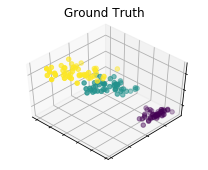

In [13]:
# start a new figure to hold all of the subplots
truth_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Plot the ground truth
add_plot(truth_figure, 1, "Ground Truth", iris_df, iris.target)

## Training and Visualization

Now let's see how k-means clusters the iris dataset, with various different numbers of clusters

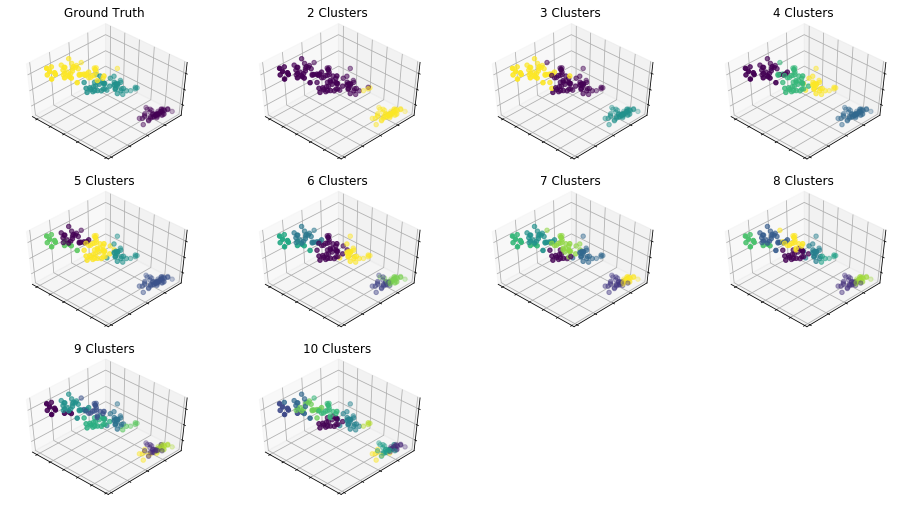

In [30]:
MAX_CLUSTERS = 10
# start a new figure to hold all of the subplots
kmeans_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Plot the ground truth
add_plot(kmeans_figure, 1, "Ground Truth", iris_df, iris.target)

plot_num = 2
for num_clusters in range(2, MAX_CLUSTERS + 1):
    # train the model
    model = KMeans(n_clusters=num_clusters)
    model.fit(iris_df)
    
    # get the predictions of which cluster each input is in
    labels = model.labels_

    # plot this clustering
    title = '{} Clusters'.format(num_clusters) 
    add_plot(kmeans_figure, plot_num, title, iris_df, labels.astype(numpy.float))
    plot_num += 1

# Exercise

1. Add [validation](https://jennselby.github.io/MachineLearningCourseNotes/#clustering-validation) to measure how good the clustering is, with different numbers of clusters.
1. Run the iris data through DBSCAN or hierarchical clustering and validate that as well.
1. Comment on the validation results, explaining which models did best and why you think that might be.

In [90]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [91]:
plot_num = 2
for num_clusters in range(2, MAX_CLUSTERS + 1):
    # train the model
    model = KMeans(n_clusters=num_clusters)
    model.fit(iris_df)
    
    # get the predictions of which cluster each input is in
    labels = model.labels_.astype(numpy.float)

    # plot this clustering
    print(str(plot_num) + ' Clusters')
    pred = labels
    
    ari = metrics.adjusted_rand_score(iris.target, pred)
    fms = metrics.fowlkes_mallows_score(iris.target, pred)
    
    print(' Adjusted Rand Index: ' + str(ari))
    print(' Fowlkes-Mallows Score: ' + str(fms))
    
    plot_num += 1

2 Clusters
 Adjusted Rand Index: 0.5399218294207123
 Fowlkes-Mallows Score: 0.7504732564880243
3 Clusters
 Adjusted Rand Index: 0.7302382722834697
 Fowlkes-Mallows Score: 0.8208080729114153
4 Clusters
 Adjusted Rand Index: 0.6460787233460947
 Fowlkes-Mallows Score: 0.7539699941396392
5 Clusters
 Adjusted Rand Index: 0.6078964652364223
 Fowlkes-Mallows Score: 0.7254830776265845
6 Clusters
 Adjusted Rand Index: 0.45507224888954784
 Fowlkes-Mallows Score: 0.608611697218172
7 Clusters
 Adjusted Rand Index: 0.47466062702517525
 Fowlkes-Mallows Score: 0.6295781940811919
8 Clusters
 Adjusted Rand Index: 0.4570179139974683
 Fowlkes-Mallows Score: 0.6167768421241371
9 Clusters
 Adjusted Rand Index: 0.37599178109980147
 Fowlkes-Mallows Score: 0.5517058457247479
10 Clusters
 Adjusted Rand Index: 0.36030472093830107
 Fowlkes-Mallows Score: 0.5388917047532727


Hierarchical Clustering
 Adjusted Rand Index: 0.5681159420289855
 Fowlkes-Mallows Score: 0.7714542762891773
DBSCAN e: 0.4, n: 3
 Adjusted Rand Index: 0.7063013754344987
 Fowlkes-Mallows Score: 0.7972475766000401
KMeans 3 Clusters
 Adjusted Rand Index: 0.7302382722834697
 Fowlkes-Mallows Score: 0.8208080729114153


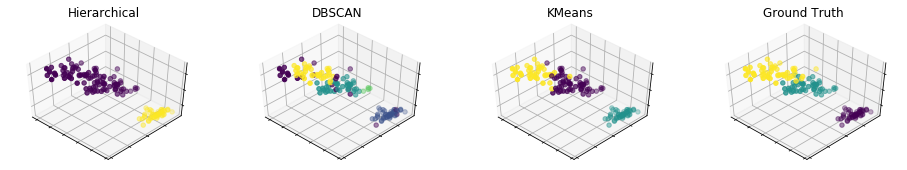

In [115]:
# start a new figure to hold all of the subplots
other_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# train the model
model1 = AgglomerativeClustering()
model2 = DBSCAN(0.4,3)
model3 = KMeans(n_clusters=3)

model1.fit(iris_df)
model2.fit(iris_df)
model3.fit(iris_df)

# get the predictions of which cluster each input is in
labels1 = model1.labels_.astype(numpy.float)
labels2 = model2.labels_.astype(numpy.float)
labels3 = model3.labels_.astype(numpy.float)

# plot this clustering
add_plot(other_figure, 1, 'Hierarchical', iris_df, labels1)
add_plot(other_figure, 2, 'DBSCAN', iris_df, labels2)
add_plot(other_figure, 3, 'KMeans', iris_df, labels3)

add_plot(other_figure, 4, "Ground Truth", iris_df, iris.target)

print('Hierarchical Clustering')
pred = labels1

ari = metrics.adjusted_rand_score(iris.target, pred)
fms = metrics.fowlkes_mallows_score(iris.target, pred)

print(' Adjusted Rand Index: ' + str(ari))
print(' Fowlkes-Mallows Score: ' + str(fms))

print('DBSCAN e: 0.4, n: 3')
pred = labels2

ari = metrics.adjusted_rand_score(iris.target, pred)
fms = metrics.fowlkes_mallows_score(iris.target, pred)

print(' Adjusted Rand Index: ' + str(ari))
print(' Fowlkes-Mallows Score: ' + str(fms))

print('KMeans 3 Clusters')
pred = labels3

ari = metrics.adjusted_rand_score(iris.target, pred)
fms = metrics.fowlkes_mallows_score(iris.target, pred)

print(' Adjusted Rand Index: ' + str(ari))
print(' Fowlkes-Mallows Score: ' + str(fms))

From these KMeans seems like the best clustering technique for this dataset. This makes a lot of sense because since you already know how many clusters there are supposed to be KMeans makes sense. DBSCAN was fairly close but only after I set the parameters to make it so that there wouldn't only be two clusters. The only problem with this was that the epsilon was so low that a bunch of points ended up being isolated as noise. Hierarchical was the worst and just by looking at the graph it seem obvious because there are only two clusters. You can change the parameters and make it better but since this wasn't exactly hierarchical (it was AgglomerativeClustering) I didn't really know what they were doing.